## 1. Import Libraries and Data

In [21]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Loading dataset as data
data = pd.read_csv("online_shoppers_intention.csv")

# Make a pandas object from the data
df = pd.DataFrame(data)
print(f"DataFrame shape: {df.shape}")
df.head()

DataFrame shape: (12330, 18)
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## 2. Exploratory Data Analysis (EDA)

In [ ]:
# Basic dataset info

print("Dataset Overview:")
print(f'Shape: {df.shape}')
print(f'\nData Types: \n{df.dtypes}')
print(f"\nMissing values: \n{df.isnull().sum()}")
print(f'\nBasic Stats: \n{df.describe}')

Dataset Overview:
Shape: (12330, 18)

Data Types: 
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                

In [19]:
# Basic info, cont.

print(f"\nMissing values: \n{df.isnull().sum()}")
print(f'\nBasic Stats:')
df.describe()


Missing values: 
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Basic Stats:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


=== TARGET VARIABLE ===
Revenue distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


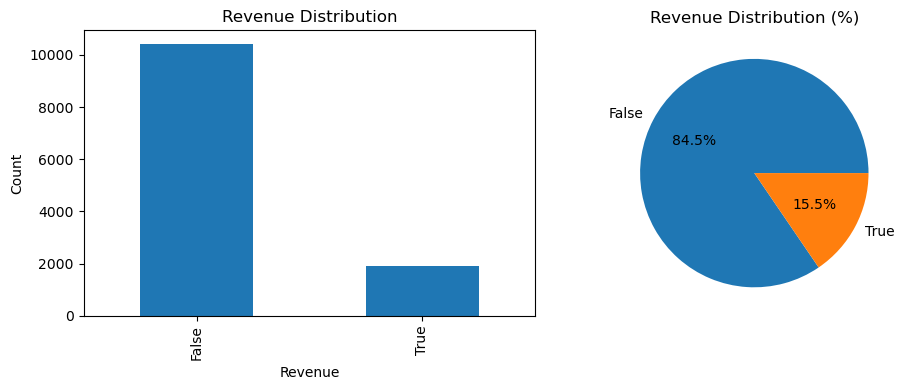

In [46]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['Revenue'].value_counts()
print(f"Revenue distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Revenue Distribution (%)')

plt.tight_layout()
plt.show()


=== NUMERICAL VARIABLES ===
Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


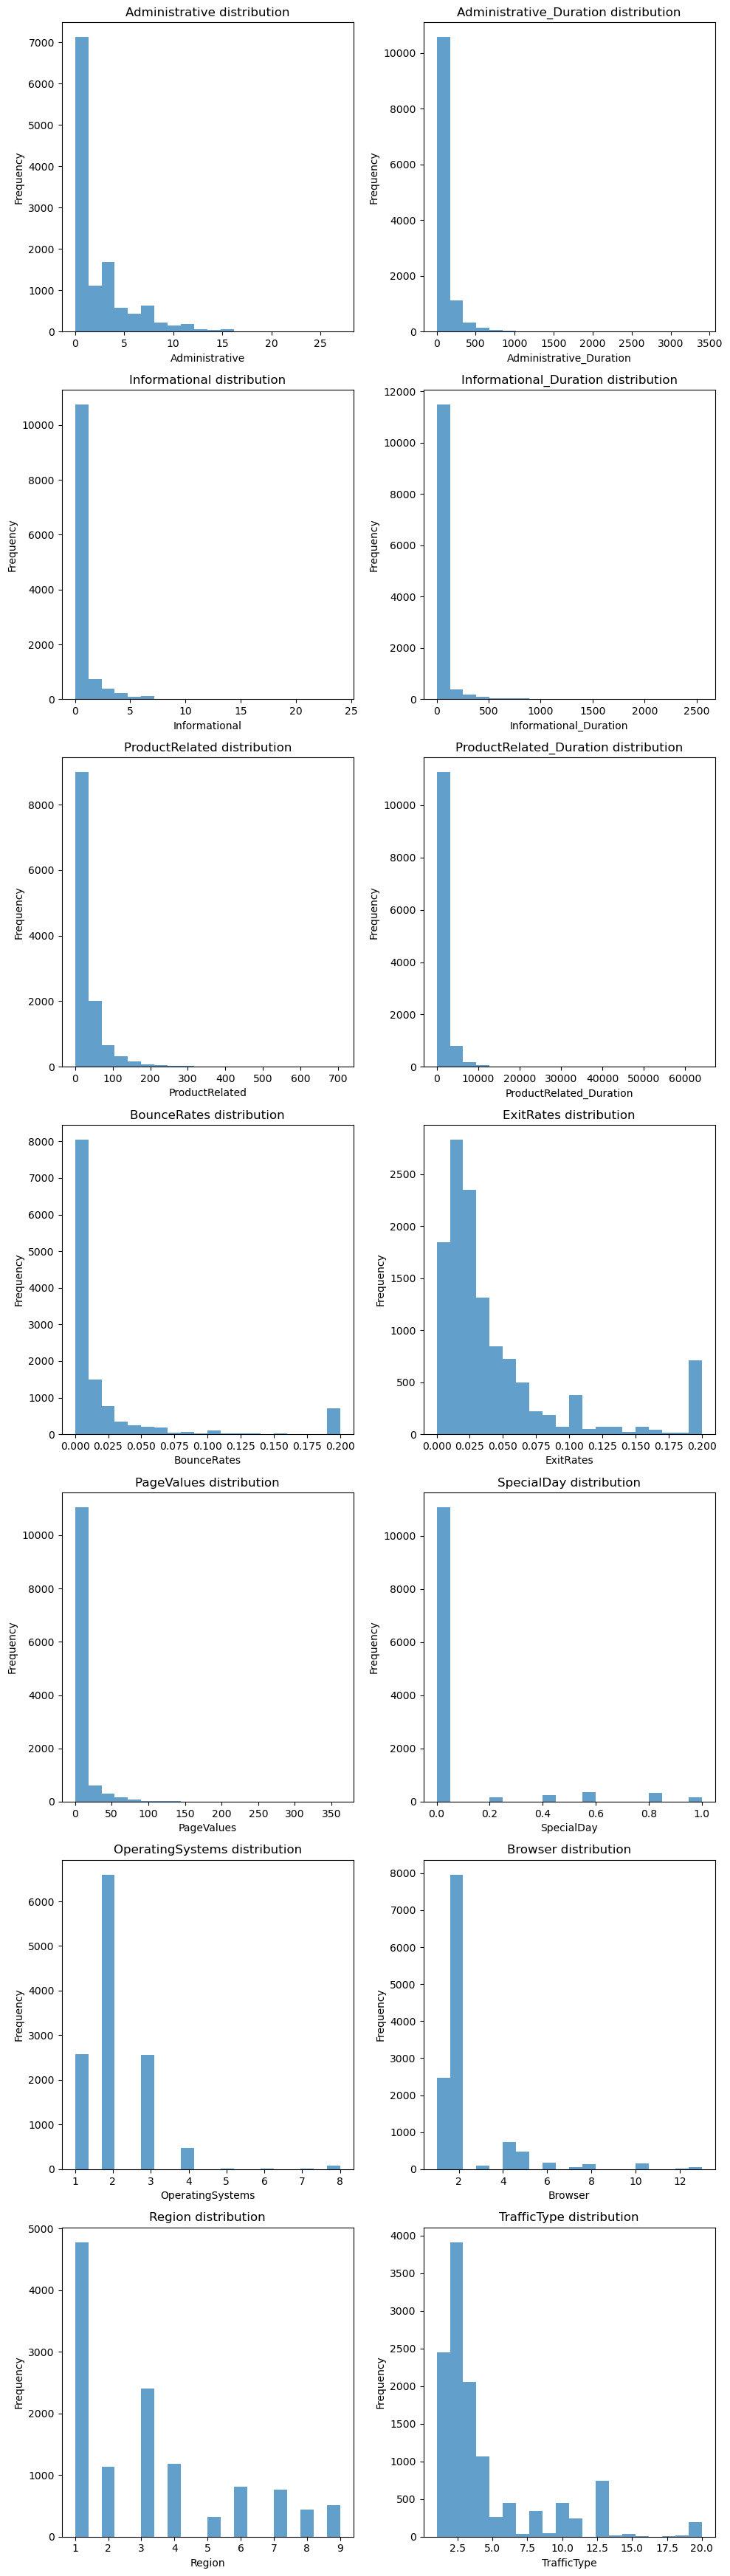

In [39]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numerical_cols)
rows = (num_plots//2)+(num_plots%2)
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
plt.figure(figsize=(10, rows*5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 2, i)
    plt.hist(df[col], bins=20, alpha=0.7)
    plt.title(f"{col} distribution")
    plt.xlabel(col) 
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: ['Month', 'VisitorType']

Month value counts:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


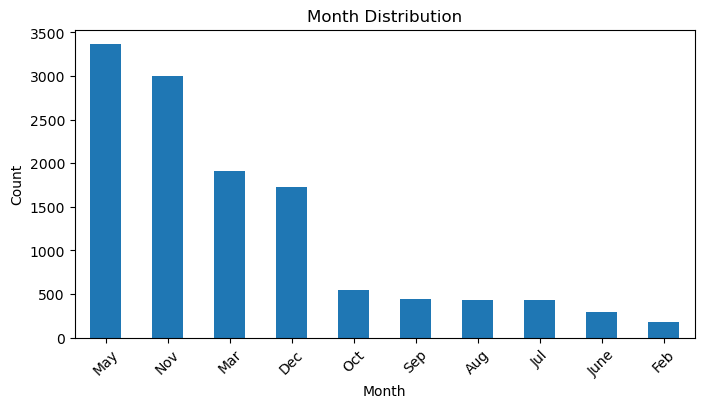


VisitorType value counts:
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


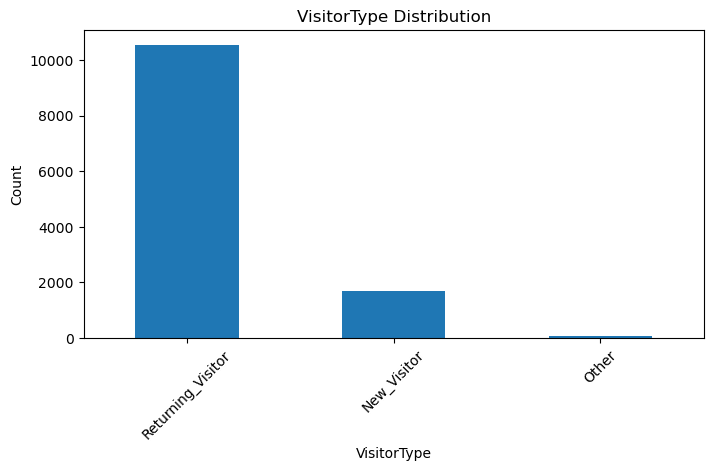

In [40]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== BOOLEAN VARIABLES ===
Categorical columns: ['Weekend', 'Revenue']

Weekend value counts:
Weekend
False    9462
True     2868
Name: count, dtype: int64


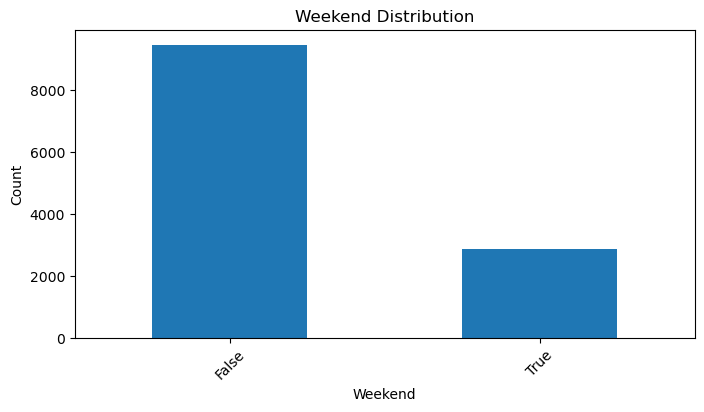


Revenue value counts:
Revenue
False    10422
True      1908
Name: count, dtype: int64


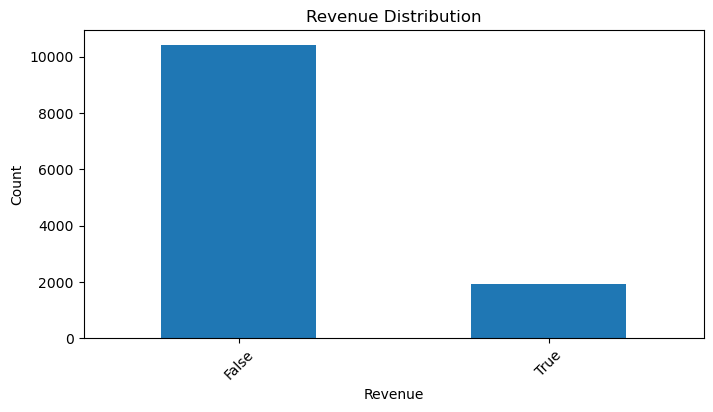

In [41]:
# Categorical variables analysis
print("=== BOOLEAN VARIABLES ===")
boolean_cols = df.select_dtypes(include=['bool']).columns
print(f"Categorical columns: {list(boolean_cols)}")

for col in boolean_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Since we have multiple categorical and boolean values, a correlation matrix would leave out important information

RELATIONSHIPS WITH REVENUE


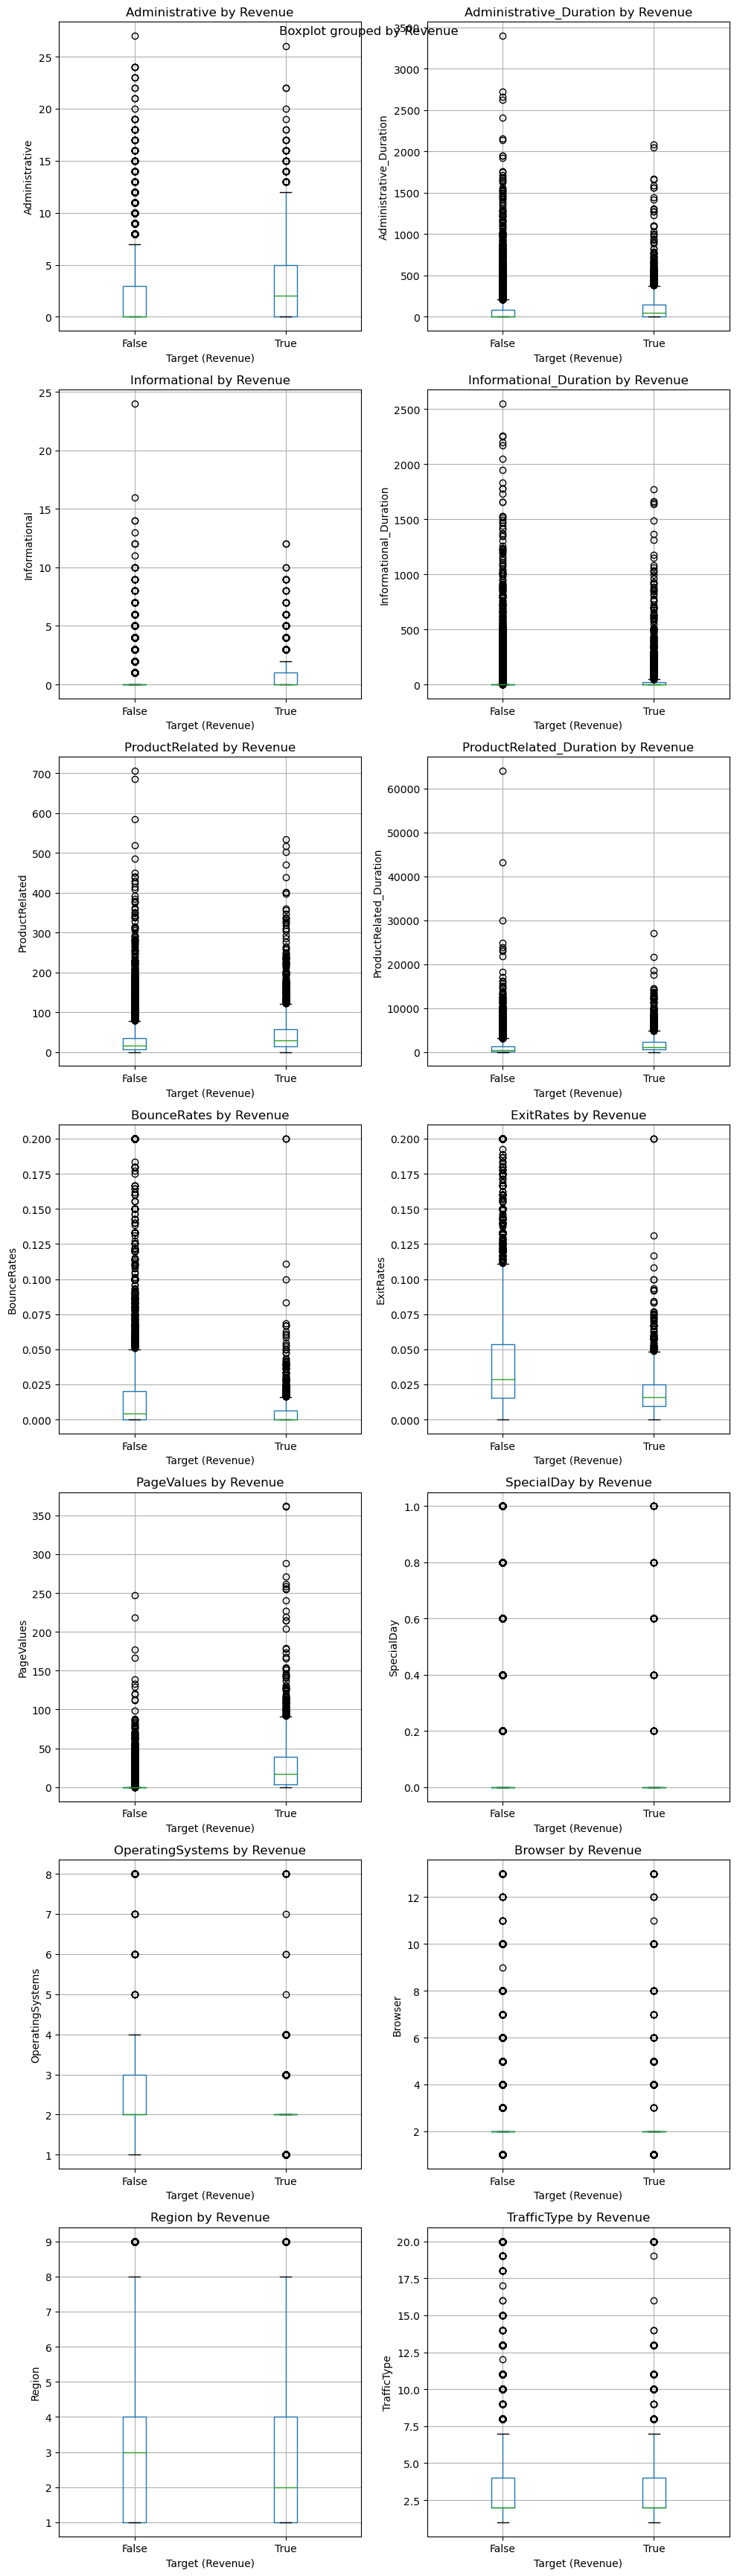


Month vs Revenue:
Revenue  False  True 
Month                
Aug      0.824  0.176
Dec      0.875  0.125
Feb      0.984  0.016
Jul      0.847  0.153
June     0.899  0.101
Mar      0.899  0.101
May      0.891  0.109
Nov      0.746  0.254
Oct      0.791  0.209
Sep      0.808  0.192

VisitorType vs Revenue:
Revenue            False  True 
VisitorType                    
New_Visitor        0.751  0.249
Other              0.812  0.188
Returning_Visitor  0.861  0.139


In [56]:
# Relationship between variables and target
print("RELATIONSHIPS WITH REVENUE")

# Box plots for numerical variables vs target
numerical_cols_no_target = [col for col in numerical_cols if col != 'Revenue']
num_plots = len(numerical_cols_no_target)
rows = (num_plots // 2) + (num_plots % 2)
fig, axes = plt.subplots(rows, 2, figsize=(10, rows*5))
axes = axes.flatten()
    
for i, col in enumerate(numerical_cols_no_target):
    ax = axes[i]
    df.boxplot(column=col, by='Revenue', ax=ax)
    ax.set_title(f'{col} by Revenue')
    ax.set_xlabel('Target (Revenue)')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# Crosstabs for categorical variables vs target
for col in categorical_cols:
    print(f"\n{col} vs Revenue:")
    crosstab = pd.crosstab(df[col], df['Revenue'], normalize='index')
    print(crosstab.round(3))


## 3. Hypothesis Formulation

### Hypothesis 1:
**H1:** New visitors are less likely to make a purchase than returning visitors
- **Null Hypothesis (H0):** There is no significant relationship between VisitorType and Revenue
- **Alternative Hypothesis (H1):** There's a significant relationship between VisitorType and Revenue
- **Rationale:** VisitorType is a boolean representing whether or not a visitor is a new or returning user, so it's reasonable to assume that the likelihood of generating revenue might be different based on the type of visitor

### Hypothesis 2: 
**H2:** More revenue is generated on weekends than on weekdays
- **Null Hypothesis (H0):** There's no significant difference in Revenue between visits occurring on the weekend and those on weekdays
- **Alternative Hypothesis (H1):** There's a significant difference in Revenue between visits occurring on the weekend and those on weekdays
- **Rationale:** Customers have more time to browse and make purchases as they don't have work or school on weekends. Most people also receive their paychecks on Fridays, so they would want to spend more on weekends.


# 4. Hypothesis Testing

### Testing Hypothesis 1: New visitors are less likely to make a purchase than returning visitors

**Test Choice:** Chi-square test
- **Why appropriate:** I want to test if VistiorType and Revenue are related and the chi-square test is uesd to see if 2 categorical variables are independent


In [57]:
from scipy.stats import chi2_contingency
cross = pd.crosstab(df['VisitorType'], df['Revenue'])
chi2_stat, p_val, dof, expected = chi2_contingency(cross)
print(f"Chi2 Stat: {chi2_stat}, p-value: {p_val}")

if p_val < 0.05:
    print("Reject H0: There is a significant difference")
else:
    print("Fail to reject H0: No significant difference")

Chi2 Stat: 135.2519228192047, p-value: 4.269904152293867e-30
Reject H0: There is a significant difference


### Testing Hypothesis 2: More revenue is generated on weekends than on weekdays

**Test Choice:** Chi-square test
- **Why appropriate:** Chi-square can be used to check if the occurrence of purchases (Revenue) is independent of whether or not the visit occurred on the weekend


In [58]:
from scipy.stats import chi2_contingency
cross = pd.crosstab(df['Weekend'], df['Revenue'])
chi2_stat, p_val, dof, expected = chi2_contingency(cross)
print(f"Chi2 Stat: {chi2_stat}, p-value: {p_val}")

if p_val < 0.05:
    print("Reject H0: There is a significant difference")
else:
    print("Fail to reject H0: No significant difference")

Chi2 Stat: 10.390978319534856, p-value: 0.0012663251061221968
Reject H0: There is a significant difference


# 5. Summary and Conclusions

## Key Findings from EDA:
 - 1. Most missing values were from numeric features
 - 2. Majority of rows indicated no purchase in the Revenue variable, which should be noted when sampling to balance the classes for modeling
 - 3. Most numerical values have skewed distributions. Duration-related columns showed positive skewness, which could be taken into account when building models
 

 ### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | chi-square | 4.269904152293867e-30 | Significant | New visitors are less likely to make purchases than returning visitors |
| **H2** | chi-square | 0.0012663251061221968 | Significant | Purchases are more likely to be made during the weekend than on a weekday|

### Key Insights:
- Since new visitors are less likely to make purchases, consider adding targeted incentives for new users
- PageValues, ExitRates, and ProductRelated show high correlations with Revenue, suggesting web analytics and user behavior data could help in customer conversion

### Future Research:
- Find seasonal data (holiday sales, Black Friday, etc.) and explore their influence on Reveneue. Can also look at month/quarter-based patterns to find seasonal fluctuations
- Try segmenting users based on browsing behaviors and use clustering analysis to find purchase patterns in distinct user groups

---